In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('data/rfm_data.csv')
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime

# Convert 'PurchaseDate' column to datetime
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

# Calculate Recency, Frequency, and Monetary Value
current_date = df['PurchaseDate'].max()
df['Recency'] = (current_date - df['PurchaseDate']).dt.days
rfm_data = df.groupby('CustomerID').agg({
    'Recency': 'min',
    'CustomerID': 'count',
    'TransactionAmount': 'sum'
}).rename(columns={
    'CustomerID': 'Frequency',
    'TransactionAmount': 'MonetaryValue'
})

# Standardize the RFM features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(rfm_scaled)

# Assign clusters to customers
rfm_data['Cluster'] = kmeans.labels_

# Print cluster centers
print("Cluster Centers:")
print(pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=rfm_data.columns[:-1]))

# Print cluster sizes
print("\nCluster Sizes:")
print(rfm_data['Cluster'].value_counts())


Cluster Centers:
     Recency  Frequency  MonetaryValue
0  14.012107   1.000000     518.210460
1  44.439834   1.000000     508.217033
2  22.686275   2.058824    1072.476078

Cluster Sizes:
Cluster
1    482
0    413
2     51
Name: count, dtype: int64


/Users/blairwhite/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

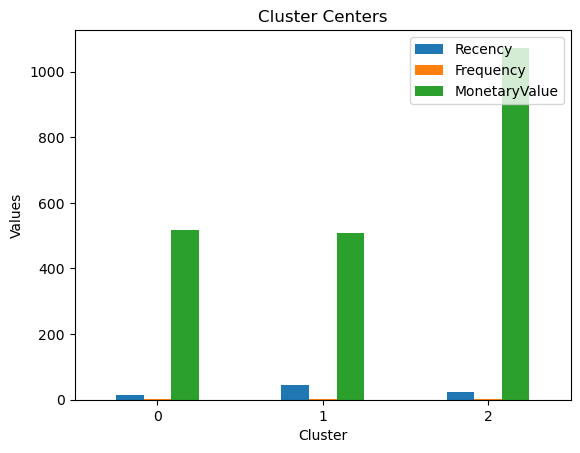

In [6]:
import matplotlib.pyplot as plt

# Extract cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=rfm_data.columns[:-1])

# Plot cluster centers
plt.figure(figsize=(10, 6))
cluster_centers_df.plot(kind='bar')
plt.title('Cluster Centers')
plt.xlabel('Cluster')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()


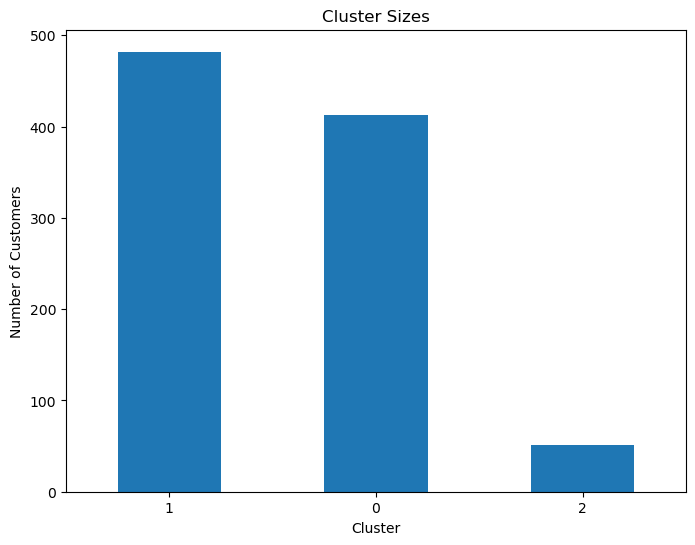

In [7]:
# Plot cluster sizes
plt.figure(figsize=(8, 6))
rfm_data['Cluster'].value_counts().plot(kind='bar')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()


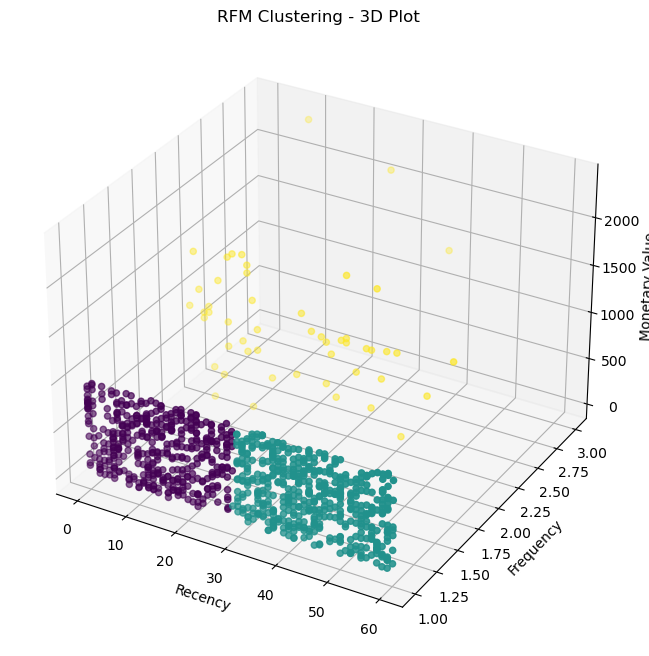

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_data['Recency'], rfm_data['Frequency'], rfm_data['MonetaryValue'], c=rfm_data['Cluster'], cmap='viridis')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.set_title('RFM Clustering - 3D Plot')
plt.show()
